In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./doctor-strange-2-benedict-cumberbatch.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

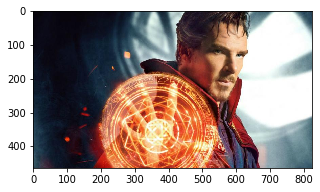

(464, 825, 3)


In [5]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [6]:
c_img = img.copy()
c_img = np.reshape(c_img, (-1,3))

print (c_img.shape)

(382800, 3)


In [7]:
kmeans = KMeans(n_clusters=7,random_state=2)

In [8]:
kmeans.fit_predict(c_img)

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [11]:
centers = kmeans.cluster_centers_.astype(int)

print (centers)

[[ 22  22  34]
 [165 186 189]
 [133  48  36]
 [242 189 134]
 [249 251 247]
 [ 85 107 120]
 [218 112  64]]


In [12]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.35176594 0.07644723 0.0985815  0.09851358 0.16861285 0.08454545
 0.12153344]


In [16]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.35176593521421107, array([22, 22, 34])], [0.1686128526645768, array([249, 251, 247])], [0.12153343782654127, array([218, 112,  64])], [0.09858150470219436, array([133,  48,  36])], [0.0985135841170324, array([242, 189, 134])], [0.08454545454545455, array([ 85, 107, 120])], [0.07644723092998955, array([165, 186, 189])]]


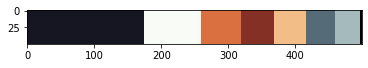

In [32]:
color_p = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()

In [34]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

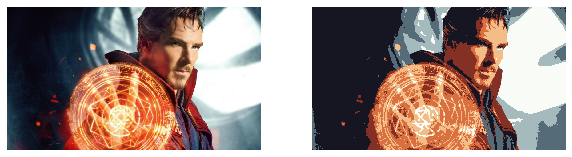

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(c_img)

plt.show()